# Random Forest Regression (Demo)

Vivek Gopalakrishnan | September 20, 2019

## Overview

Implement a simple random forest (rf) regression model. Source code is available [here]().

## Goal

Demonstrate my model's effectiveness on a simple 1-dimensional dataset. Compare to sklearn's RF regression.

## Results

My model works! But sklearn is clearly superior. There are more parameters for me to learn about.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import bspline

from rf import RF, RFDecisionNode

In [2]:
np.random.seed(0)

## Generate a noisy signal

The original signal is $\sin{x} / x$. We sample 100 points from this signal and add iid Gaussian noise to each sample.

In [3]:
def noisy_signal(x, sigma=0.1):
    x = np.array(x)
    return np.sin(x) / x + np.random.normal(scale=sigma, size=x.size)

In [4]:
x = np.linspace(10e-5, 10*np.pi, num=100)
y = noisy_signal(x, sigma=0.1)

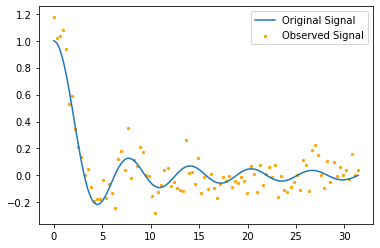

In [5]:
plt.scatter(x, y, s=5, color="orange", label="Observed Signal")
plt.plot(x, np.sin(x) / x, label="Original Signal")
plt.legend()
plt.show()

## Fit my implementation

My prediction isn't bad! I think the leaf nodes are too large since predictions seem to be a smushed version of the original signal.

Fitting the model and getting a prediction is not the easiest. The api could be streamlined because the current implementation is too clunky.

In [6]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

rf = RF(x, y, max_depth=10, n_features=1, min_leaf_size=5, n_trees=1000, n_bagging=10)
rf.create_model()

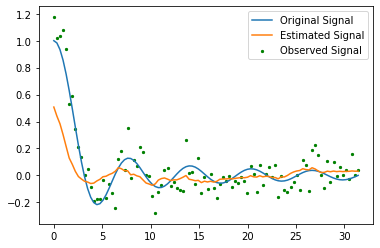

In [7]:
plt.scatter(x, y, s=5, color="green", label="Observed Signal")
plt.plot(x, np.sin(x) / x, label="Original Signal")
plt.plot(x, [np.mean(rf.predict(i)) for i in x], label="Estimated Signal")
plt.legend()
plt.show()

## Compare to sklearn's RF

sklearn's implementation blows mine out of the water! Clearly, there are other parameters to look into.

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
regr = RandomForestRegressor(max_depth=10, n_estimators=1000)
regr.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

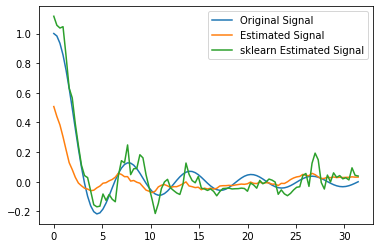

In [10]:
# plt.scatter(x, y, s=5, color="green", label="Observed Signal")
plt.plot(x, np.sin(x) / x, label="Original Signal")
plt.plot(x, [np.mean(rf.predict(i)) for i in x], label="Estimated Signal")
plt.plot(x, regr.predict(x), label="sklearn Estimated Signal")
plt.legend()
plt.show()